## 台灣新建案的趨勢分析，已收集591網站資料，找能分析的建案標的，例如103-107全台各縣市平均案量

## 提出問題 -> ＊數據前處理-> 特徵工程 -> 建立模型 -> 調整參數 -> 上線預測

## 導入庫

In [1]:
#-*- coding=utf-8 -*-
import os

import pandas as pd
from pandas import DataFrame, Series, Index

import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import colors
myfont = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc', size=14)

import re

## 讀csv

In [2]:
df = pd.read_csv(os.path.join('./', '591.csv'))
print(df.shape)
print()

print(df.head())

# Save
# df.to_csv('591_.csv')

(3533, 27)

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1     hid  建案名稱 每坪單價(萬元/坪)  每坪單價(低)  \
0           0             0               0  115256  小春日和  24~26萬元/坪     24.0   
1           1             1               1  116867  IG愛家  17~19萬元/坪     17.0   
2           2             2               2  111953   文賢苑  28~30萬元/坪     28.0   
3           3             3               3  115083  恆上沐悅  23~28萬元/坪     23.0   
4           4             4               4  110896  龍騰城堡  18~21萬元/坪     18.0   

   每坪單價(高)    均價 基地地址-縣市         ...                 樓層規劃 結構工程 用途規劃      土地分區  \
0     26.0  25.0     台中市         ...           地上15層，地下4層   RC  住商用  第三之ㄧ種商業區   
1     19.0  18.0     高雄市         ...           地上15層，地下3層   RC  住商用    第四種住宅區   
2     30.0  29.0     高雄市         ...           地上15層，地下3層   RC  住家用        暫無   
3     28.0  25.5     高雄市         ...           地上14層，地下3層   RC  住家用    第四種住宅區   
4     21.0  19.5     高雄市         ...           地上28層，地下6層  SRC  住商用    第四種商業區   

             投

In [3]:
print(df.dtypes)

Unnamed: 0          int64
Unnamed: 0.1        int64
Unnamed: 0.1.1      int64
hid                 int64
建案名稱               object
每坪單價(萬元/坪)         object
每坪單價(低)           float64
每坪單價(高)           float64
均價                float64
基地地址-縣市            object
基地地址-鄉鎮區           object
基地地址               object
格局規劃               object
交屋時間               object
預期完工               object
基地面積(坪)            object
棟戶規劃               object
樓層規劃               object
結構工程               object
用途規劃               object
土地分區               object
投資建設               object
建材說明               object
建築設計               object
營造公司               object
建造執照               object
使用執照               object
dtype: object


In [4]:
print(df.columns)
for col in df.columns:
    print(col)
    print(df[col].describe())
    print('\n--------------------\n')

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'hid', '建案名稱',
       '每坪單價(萬元/坪)', '每坪單價(低)', '每坪單價(高)', '均價', '基地地址-縣市', '基地地址-鄉鎮區', '基地地址',
       '格局規劃', '交屋時間', '預期完工', '基地面積(坪)', '棟戶規劃', '樓層規劃', '結構工程', '用途規劃',
       '土地分區', '投資建設', '建材說明', '建築設計', '營造公司', '建造執照', '使用執照'],
      dtype='object')
Unnamed: 0
count    3533.000000
mean     1766.000000
std      1020.033578
min         0.000000
25%       883.000000
50%      1766.000000
75%      2649.000000
max      3532.000000
Name: Unnamed: 0, dtype: float64

--------------------

Unnamed: 0.1
count    3533.000000
mean     1766.000000
std      1020.033578
min         0.000000
25%       883.000000
50%      1766.000000
75%      2649.000000
max      3532.000000
Name: Unnamed: 0.1, dtype: float64

--------------------

Unnamed: 0.1.1
count    3533.000000
mean     1766.000000
std      1020.033578
min         0.000000
25%       883.000000
50%      1766.000000
75%      2649.000000
max      3532.000000
Name: Unnamed: 0.1.1, dtype: floa

## 移除無用的欄位

In [5]:
trivia_df = df.loc[:, ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'hid']]
print(trivia_df.head())
print()

print(df.shape)
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'hid'], axis=1, inplace=True)
print(df.shape)

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1     hid
0           0             0               0  115256
1           1             1               1  116867
2           2             2               2  111953
3           3             3               3  115083
4           4             4               4  110896

(3533, 27)
(3533, 23)


## 處理缺失值

In [6]:
print(df.isnull().sum())

建案名稱             0
每坪單價(萬元/坪)       0
每坪單價(低)          0
每坪單價(高)        745
均價               0
基地地址-縣市          0
基地地址-鄉鎮區         0
基地地址             0
格局規劃             0
交屋時間          1163
預期完工          2370
基地面積(坪)          0
棟戶規劃             3
樓層規劃             0
結構工程             0
用途規劃             0
土地分區             0
投資建設             1
建材說明             2
建築設計             0
營造公司             0
建造執照             0
使用執照             0
dtype: int64


In [7]:
if df['棟戶規劃'].isnull().sum() > 0:
    df['棟戶規劃'].fillna('暫無', inplace=True)

if df['投資建設'].isnull().sum() > 0:
    df['投資建設'].fillna('暫無', inplace=True)
    
if df['建材說明'].isnull().sum() > 0:
    df['建材說明'].fillna('暫無', inplace=True)
    
print(df.isnull().sum())

建案名稱             0
每坪單價(萬元/坪)       0
每坪單價(低)          0
每坪單價(高)        745
均價               0
基地地址-縣市          0
基地地址-鄉鎮區         0
基地地址             0
格局規劃             0
交屋時間          1163
預期完工          2370
基地面積(坪)          0
棟戶規劃             0
樓層規劃             0
結構工程             0
用途規劃             0
土地分區             0
投資建設             0
建材說明             0
建築設計             0
營造公司             0
建造執照             0
使用執照             0
dtype: int64


In [8]:
print(df['每坪單價(萬元/坪)'][:10])
print(df['每坪單價(低)'][:10])
print(df['每坪單價(高)'][:10])

print()

0    24~26萬元/坪
1    17~19萬元/坪
2    28~30萬元/坪
3    23~28萬元/坪
4    18~21萬元/坪
5    25~28萬元/坪
6       41萬元/坪
7    22~24萬元/坪
8    31~33萬元/坪
9    33~38萬元/坪
Name: 每坪單價(萬元/坪), dtype: object
0    24.0
1    17.0
2    28.0
3    23.0
4    18.0
5    25.0
6    41.0
7    22.0
8    31.0
9    33.0
Name: 每坪單價(低), dtype: float64
0    26.0
1    19.0
2    30.0
3    28.0
4    21.0
5    28.0
6     NaN
7    24.0
8    33.0
9    38.0
Name: 每坪單價(高), dtype: float64



In [9]:
idx = df.loc[df['每坪單價(高)'].isnull(), '每坪單價(高)']
print(idx.shape)

for row in idx.index.values:
    df.loc[row, '每坪單價(高)'] = df.loc[row, '每坪單價(低)']
    
print(df.isnull().sum())

(745,)
建案名稱             0
每坪單價(萬元/坪)       0
每坪單價(低)          0
每坪單價(高)          0
均價               0
基地地址-縣市          0
基地地址-鄉鎮區         0
基地地址             0
格局規劃             0
交屋時間          1163
預期完工          2370
基地面積(坪)          0
棟戶規劃             0
樓層規劃             0
結構工程             0
用途規劃             0
土地分區             0
投資建設             0
建材說明             0
建築設計             0
營造公司             0
建造執照             0
使用執照             0
dtype: int64


In [10]:
print(df['預期完工'][90:100])
print()
print(df['交屋時間'][90:100])

90         NaN
91         NaN
92         NaN
93         NaN
94         NaN
95    2019年12月
96         NaN
97        隨時交屋
98         NaN
99    2022年上半年
Name: 預期完工, dtype: object

90    2019年5月
91       時間待定
92       隨時交屋
93       隨時交屋
94       隨時交屋
95        NaN
96       隨時交屋
97        NaN
98       隨時交屋
99        NaN
Name: 交屋時間, dtype: object


In [11]:
inds = df.loc[df['預期完工'].isnull(), '預期完工']
for row in inds.index.values:
    df.loc[row, '預期完工'] = df.loc[row, '交屋時間']
    
inds = df.loc[df['交屋時間'].isnull(), '交屋時間']
for row in inds.index.values:
    df.loc[row, '交屋時間'] = df.loc[row, '預期完工']

print(df.isnull().sum())

建案名稱          0
每坪單價(萬元/坪)    0
每坪單價(低)       0
每坪單價(高)       0
均價            0
基地地址-縣市       0
基地地址-鄉鎮區      0
基地地址          0
格局規劃          0
交屋時間          0
預期完工          0
基地面積(坪)       0
棟戶規劃          0
樓層規劃          0
結構工程          0
用途規劃          0
土地分區          0
投資建設          0
建材說明          0
建築設計          0
營造公司          0
建造執照          0
使用執照          0
dtype: int64


## 新增特徵（建照執照年）

In [12]:
'(104)高市工建築字第02629號'
'﹝103﹞府工建字第00388號'
'104中都建字第00701號'
'建102-1772-01'
'使104-0635,使104-0697'
'99-0457'
'(106)(7)(21)壯鄉工字第07272至07272-26號'
'A區(107)屏府城管建(屏)字第01178號、B區(107-1068號)'
'10201811'
'暫無'
'(變照中)'
'(改照中)'
'壯鄉工字第1060006195號'
'嘉市府都建執字第0000336號'

print(df['建造執照'].head())

0        104中都建字第00701號
1    (104)高市工建築字第02629號
2    (103)高市工建築字第01256號
3    (103)高市工建築字第01861號
4    (100)高市工建築字第02356號
Name: 建造執照, dtype: object


In [13]:
for row in range(len(df['建造執照'].values)):
    str = df['建造執照'].values[row]
    mo = re.search('\d{2,3}', str)
    if mo and int(mo.group())>100 and int(mo.group()) <= 109:
        df.loc[row, '建造執照年'] = int(mo.group())
    else:
        df.loc[row, '建造執照年'] = np.nan
print(df.shape)
print(df['建造執照年'].value_counts().sort_index(ascending=False))

(3533, 24)
109.0      1
108.0     44
107.0    349
106.0    329
105.0    303
104.0    495
103.0    584
102.0    409
101.0    191
Name: 建造執照年, dtype: int64


## 可視化（各縣市近年建照執照數量，各縣市每坪房價數量）

['台中市' '高雄市' '新北市' '桃園市' '台北市' '台南市' '新竹縣' '宜蘭縣' '苗栗縣' '新竹市' '屏東縣' '基隆市'
 '花蓮縣' '雲林縣' '彰化縣' '南投縣' '嘉義市' '金門縣' '台東縣' '嘉義縣']
(20,)


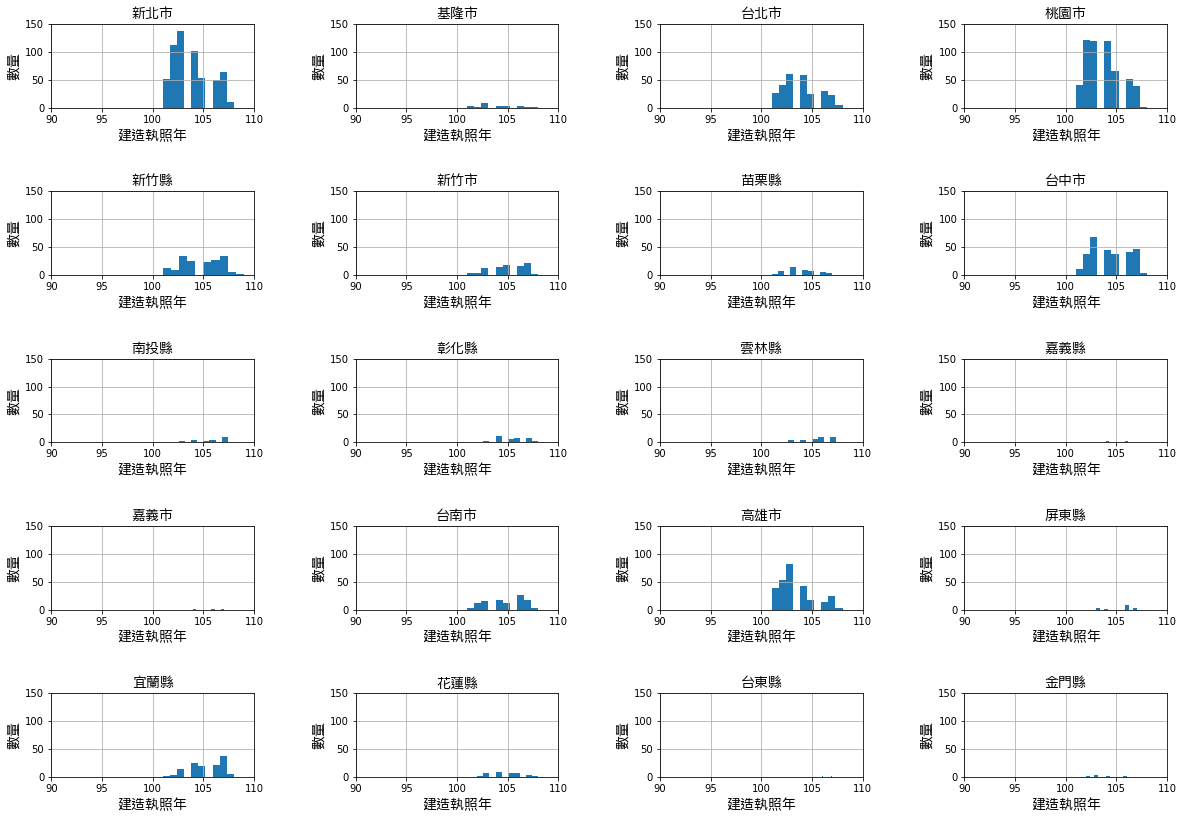

In [14]:
unique = df['基地地址-縣市'].unique()
print(unique)
print(unique.shape)

unique = ['新北市','基隆市','台北市','桃園市','新竹縣','新竹市','苗栗縣','台中市','南投縣','彰化縣','雲林縣','嘉義縣','嘉義市','台南市','高雄市','屏東縣','宜蘭縣','花蓮縣','台東縣','金門縣']

nrows = len(unique)
ncols = 4

fig = plt.figure(figsize=(20,60))
for i in range(len(unique)):
    plt.subplots_adjust(wspace =0.5, hspace =1.0)
    ax = plt.subplot(nrows, ncols, i+1)
    ax.set_xlim([90,110])
    ax.set_ylim([0,150])
    df.loc[df['基地地址-縣市'] == unique[i], '建造執照年'].hist()
    plt.xlabel('建造執照年', fontproperties=myfont)
    plt.ylabel('數量', fontproperties=myfont)
    plt.title(unique[i], fontproperties=myfont)
plt.show()  
fig.savefig('test.png')

['台中市' '高雄市' '新北市' '桃園市' '台北市' '台南市' '新竹縣' '宜蘭縣' '苗栗縣' '新竹市' '屏東縣' '基隆市'
 '花蓮縣' '雲林縣' '彰化縣' '南投縣' '嘉義市' '金門縣' '台東縣' '嘉義縣']
(20,)


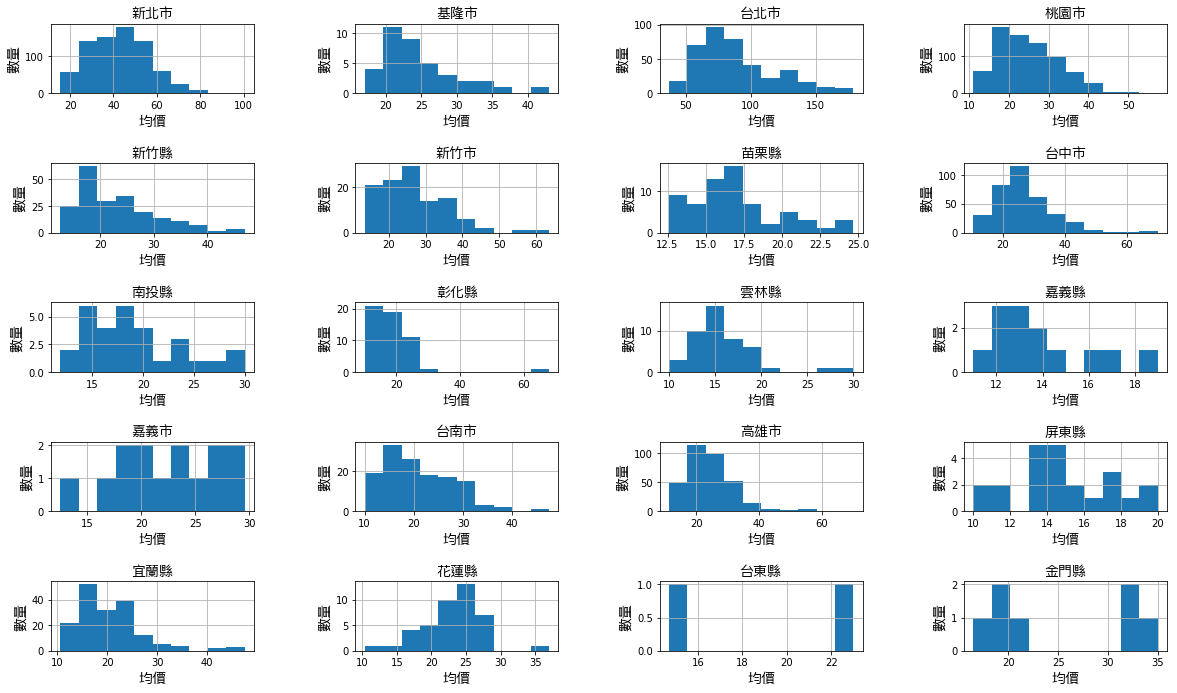

In [15]:
unique = df['基地地址-縣市'].unique()
print(unique)
print(unique.shape)

unique = ['新北市','基隆市','台北市','桃園市','新竹縣','新竹市','苗栗縣','台中市','南投縣','彰化縣','雲林縣','嘉義縣','嘉義市','台南市','高雄市','屏東縣','宜蘭縣','花蓮縣','台東縣','金門縣']

nrows = len(unique)
ncols = 4

fig = plt.figure(figsize=(20,50))
for i in range(len(unique)):
    plt.subplots_adjust(wspace =0.5, hspace =1.0)
    plt.subplot(nrows, ncols, i+1)
    df.loc[df['基地地址-縣市'] == unique[i], '均價'].hist()
    plt.xlabel('均價', fontproperties=myfont)
    plt.ylabel('數量', fontproperties=myfont)
    plt.title(unique[i], fontproperties=myfont)
plt.show()  
fig.savefig('test.png')

## 有興趣的項目（各縣市最貴的房子，蓋最多房子的建商）

In [16]:
print(df[(df['基地地址-縣市']=='彰化縣') & (df['均價']>60)])

     建案名稱 每坪單價(萬元/坪)  每坪單價(低)  每坪單價(高)    均價 基地地址-縣市 基地地址-鄉鎮區     基地地址  \
2025   品苑  66~70萬元/坪     66.0     70.0  68.0     彰化縣      北斗鎮  地政路360巷   

                       格局規劃  交屋時間  ...   結構工程 用途規劃 土地分區        投資建設  \
2025  地坪（33.19坪）、建坪（66.96坪）  隨時交屋  ...     RC  住家用  住宅區  森洋開發建設有限公司   

                            建材說明    建築設計  營造公司                   建造執照 使用執照  \
2025  筏式基礎，歐美衛浴品牌，義大利廚具、日本ＹＫＫ鋁門窗  李肇基建築師  春越營照  (105)府建管(建)字第0332917號   暫無   

      建造執照年  
2025  105.0  

[1 rows x 24 columns]


In [17]:
unique = df['基地地址-縣市'].unique()
unique = ['新北市','基隆市','台北市','桃園市','新竹縣','新竹市','苗栗縣','台中市','南投縣','彰化縣','雲林縣','嘉義縣','嘉義市','台南市','高雄市','屏東縣','宜蘭縣','花蓮縣','台東縣','金門縣']

for i in range(len(unique)):
    print('\n-------------------- ' + unique[i] + ' --------------------\n')
    print(df.loc[df[df['基地地址-縣市']==unique[i]]['均價'].idxmax(), :])
    print('\n\n')


-------------------- 新北市 --------------------

建案名稱                                                       ?峰再現
每坪單價(萬元/坪)                                           97~104萬元/坪
每坪單價(低)                                                      97
每坪單價(高)                                                     104
均價                                                        100.5
基地地址-縣市                                                     新北市
基地地址-鄉鎮區                                                    新店區
基地地址                                                   華城路秀岡三街口
格局規劃                                           地坪（140坪）、建坪（90坪）
交屋時間                                                       隨時交屋
預期完工                                                       隨時交屋
基地面積(坪)                                                    1200
棟戶規劃                                                    8棟，8戶住家
樓層規劃                                                       地上2層
結構工程                                                    

In [18]:
unique = df['投資建設'].value_counts().index.values
print(unique)
print()

for i in range(min(len(unique), 10)):
    print(unique[i])
    print(df[df['投資建設'] == unique[i]]['基地地址-縣市'].value_counts())
    print()

['興富發建設股份有限公司' '遠雄建設事業股份有限公司' '櫻花建設股份有限公司' ... '合發建設股份有限公司' '尊勝建設開發股份有限公司'
 '元智建設有限公司']

興富發建設股份有限公司
新北市    4
台北市    3
新竹縣    2
台南市    2
高雄市    2
台中市    1
Name: 基地地址-縣市, dtype: int64

遠雄建設事業股份有限公司
新北市    3
新竹縣    2
台北市    2
台中市    1
苗栗縣    1
桃園市    1
Name: 基地地址-縣市, dtype: int64

櫻花建設股份有限公司
台中市    6
桃園市    2
新北市    1
Name: 基地地址-縣市, dtype: int64

富宇建設
台中市    5
新竹縣    2
南投縣    1
新竹市    1
Name: 基地地址-縣市, dtype: int64

城揚建設
高雄市    8
Name: 基地地址-縣市, dtype: int64

興富發建設
台中市    4
高雄市    2
新竹縣    1
桃園市    1
Name: 基地地址-縣市, dtype: int64

冠德建設
新北市    7
台北市    1
Name: 基地地址-縣市, dtype: int64

大霖建設有限公司
新竹市    5
新竹縣    3
Name: 基地地址-縣市, dtype: int64

韋創建設有限公司
桃園市    5
新竹縣    2
Name: 基地地址-縣市, dtype: int64

總太地產開發股份有限公司
台中市    7
Name: 基地地址-縣市, dtype: int64



## 機器學習預測明年新建案數量

In [19]:
vc = df['基地地址-縣市'].value_counts()
print(vc)
print()

# 六都 ['新北市','台北市','桃園市','台中市','台南市','高雄市']

新北市    765
桃園市    722
台北市    396
台中市    350
高雄市    342
新竹縣    207
宜蘭縣    171
台南市    134
新竹市    112
苗栗縣     66
彰化縣     53
雲林縣     46
花蓮縣     42
基隆市     38
南投縣     30
屏東縣     23
嘉義市     14
嘉義縣     13
金門縣      7
台東縣      2
Name: 基地地址-縣市, dtype: int64



In [20]:
unique = vc.index.values[:9]
print(unique)

for i in range(len(unique)):
    print(unique[i])
    print(df.loc[df['基地地址-縣市'] == unique[i], '建造執照年'].value_counts().sort_index(ascending=False))
    print('\n---------------------\n')

['新北市' '桃園市' '台北市' '台中市' '高雄市' '新竹縣' '宜蘭縣' '台南市' '新竹市']
新北市
108.0     10
107.0     64
106.0     50
105.0     53
104.0    102
103.0    137
102.0    113
101.0     52
Name: 建造執照年, dtype: int64

---------------------

桃園市
108.0      2
107.0     39
106.0     51
105.0     66
104.0    119
103.0    119
102.0    122
101.0     40
Name: 建造執照年, dtype: int64

---------------------

台北市
108.0     5
107.0    23
106.0    30
105.0    24
104.0    59
103.0    60
102.0    40
101.0    26
Name: 建造執照年, dtype: int64

---------------------

台中市
108.0     4
107.0    46
106.0    42
105.0    37
104.0    45
103.0    68
102.0    38
101.0    10
Name: 建造執照年, dtype: int64

---------------------

高雄市
108.0     3
107.0    24
106.0    13
105.0    17
104.0    42
103.0    81
102.0    53
101.0    38
Name: 建造執照年, dtype: int64

---------------------

新竹縣
109.0     1
108.0     5
107.0    34
106.0    27
105.0    24
104.0    25
103.0    35
102.0     9
101.0    12
Name: 建造執照年, dtype: int64

---------------------

宜蘭縣
108.0     5


In [21]:
from sklearn import linear_model

unique = vc.index.values[:9]

for i in range(len(unique)):
    print(unique[i])
    sr = df.loc[df['基地地址-縣市'] == unique[i], '建造執照年'].value_counts().sort_index(ascending=False)
    
    sr_after = sr[sr.index >= 107]
    sr_before = sr[~(sr.index >= 107)]

    X_train = sr_before.index.values[:, np.newaxis]
    y_train = sr_before.values[:, np.newaxis]
    
    X_test = sr_after.index.values[:,np.newaxis]
    y_test = sr_after.values[:, np.newaxis]
    
#     print('X_train:', X_train)
#     print('y_train:', y_train)
#     print('X_test:', X_test)
#     print('y_test:', y_test)
    
    estimator = linear_model.LinearRegression()
    estimator.fit(X_train, y_train)
    
    predict = estimator.predict(X_test)
    results = zip(X_test, predict, y_test)
    print('[year] [predict]     [real]')
    for r in results:
        print(*r)
    
    print('\n---------------------\n')

新北市
[year] [predict]     [real]
[108.] [55.57142857] [10]
[107.] [62.] [64]

---------------------

桃園市
[year] [predict]     [real]
[108.] [71.63809524] [2]
[107.] [74.86666667] [39]

---------------------

台北市
[year] [predict]     [real]
[108.] [36.1047619] [5]
[107.] [36.93333333] [23]

---------------------

台中市
[year] [predict]     [real]
[108.] [57.22857143] [4]
[107.] [53.4] [46]

---------------------

高雄市
[year] [predict]     [real]
[108.] [5.6952381] [3]
[107.] [13.46666667] [24]

---------------------

新竹縣
[year] [predict]     [real]
[109.] [39.28571429] [1]
[108.] [36.14285714] [5]
[107.] [33.] [34]

---------------------

宜蘭縣
[year] [predict]     [real]
[108.] [34.13333333] [5]
[107.] [29.73333333] [37]

---------------------

台南市
[year] [predict]     [real]
[108.] [29.68571429] [3]
[107.] [26.2] [18]

---------------------

新竹市
[year] [predict]     [real]
[108.] [25.51428571] [1]
[107.] [22.4] [22]

---------------------

